In [4]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
import os 

# Load dataset
os.chdir(r"C:\Users\Sahana Dhandapani\OneDrive\Documents")
data = pd.read_excel("coded responses.xlsx")

# Strip whitespace from column names and rename them properly
data.columns = data.columns.str.strip()
data = data.rename(columns={
    'problem solving': 'Problem_Solving',
    'Learning&dev': 'Learning_Dev',
    'conflicts': 'Conflict',
    'Department': 'Department',
    'd.individual contribution': 'Individual_Contribution'
})

# Encoding Department (Converting categorical to numeric)
data['Department'] = data['Department'].astype(str).str.strip()
label_encoder = LabelEncoder()
data['Department'] = label_encoder.fit_transform(data['Department'])

# Display department encoding
department_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print("Corrected Department Encoding Mapping:")
for code, dept in department_mapping.items():
    print(f"{code} → {dept}")

# Defining independent (X) and dependent (y) variables
X = data[['Problem_Solving', 'Learning_Dev', 'Conflict' ,'Department']]
y = data['Individual_Contribution']

# Handling class imbalance using Random OverSampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = clf_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(classification_report(y_test, y_pred_rf))

# Cross-validation to check performance consistency
cv_scores = cross_val_score(clf_rf, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Performing Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Train best model
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Make predictions using optimized model
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate optimized model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest Accuracy: {accuracy_best_rf:.2f}")
print(classification_report(y_test, y_pred_best_rf))

# Decode department names
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
X_resampled_df['Department'] = label_encoder.inverse_transform(X_resampled_df['Department'])

# Create a DataFrame with department and predicted contribution
data_resampled = pd.DataFrame({'Department': X_resampled_df['Department'], 'Predicted Contribution': y_resampled})

# Rank departments based on average predicted contribution
dept_ranking = data_resampled.groupby("Department")["Predicted Contribution"].mean().sort_values(ascending=False)

# Display department ranking
print("Department Ranking (Best to Worst):")
print(dept_ranking)




Corrected Department Encoding Mapping:
0 → Data Analytics
1 → HR
2 → Integration and cloud services
3 → Software development
Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        14
           3       1.00      0.71      0.83        14
           4       0.76      1.00      0.87        13

    accuracy                           0.90        41
   macro avg       0.92      0.90      0.90        41
weighted avg       0.93      0.90      0.90        41

Cross-validation scores: [0.73170732 0.73170732 0.7804878  0.92682927 0.85      ]
Average cross-validation accuracy: 0.8041463414634146
Optimized Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        14
           3       1.00      0.71      0.83        14
           4       0.76      1.00      0.87        13

    accuracy                           0.90        41
   macro avg      

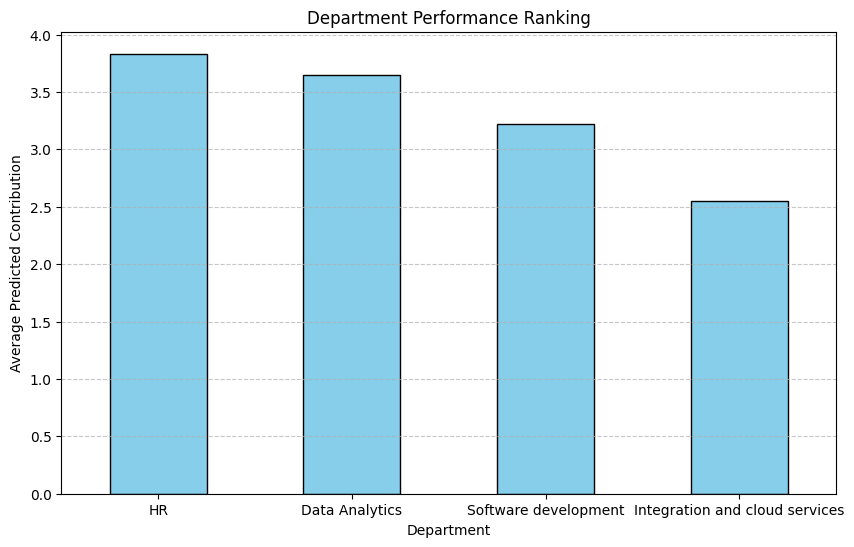

In [13]:
# 📌 Fixing Bar Chart Issue: Properly Formatting the Plot
plt.figure(figsize=(10, 6))
dept_ranking.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Department")
plt.ylabel("Average Predicted Contribution")
plt.title("Department Performance Ranking")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

